In [248]:
# import required libraries

import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor  
# from sklearn import cross_validation, metrics   
from sklearn.grid_search import GridSearchCV 
from xgboost import XGBRegressor

### Data Preparation

In [250]:
# Reading the file

df1 = pd.read_csv("./Finance_Final_data_sanity_check.csv")
df1.head(3)

year  month  High000075.KS  Low000075.KS  Open000075.KS  Close000075.KS  \
0  2007.0    1.0    29095.03065   28337.10757    28634.98438     29012.06926   
1  2007.0    2.0    27798.58185   27415.33612    27696.08185     27669.34553   
2  2007.0    3.0    26590.06885   26035.55029    26406.25635     26344.97522   

   High000157.KS  Low000157.KS  Open000157.KS  Close000157.KS     ...       \
0    22272.72727   21654.54545    22004.54545     22004.54545     ...        
1    21921.05263   21218.42105    21547.36842     21584.21053     ...        
2    27935.00000   26882.50000    27230.00000     27770.00000     ...        

   OpenWHE.BE  CloseWHE.BE  HighWHRL3.SA  LowWHRL3.SA  OpenWHRL3.SA  \
0         NaN          NaN      2.339524     2.171429      2.171429   
1         NaN          NaN      2.342222     2.125000      2.176667   
2         NaN          NaN      2.381364     2.211818      2.256364   

   CloseWHRL3.SA    High^IXIC     Low^IXIC    Open^IXIC   Close^IXIC  
0       2.188571  2465.036011  2436.571997  2451.197498  2453.187000  
1       2.176111  2491.339458  2466.998420  2482.686845  2479.864194  
2       2.300909  2414.307273  2386.536366  2401.696811  2401.490867  

[3 rows x 4298 columns]

In [251]:
df1.shape

(134, 4298)

In [252]:
df1=df1.fillna(0)
df1.shape

(134, 4298)

In [253]:
 df1 = df1.drop(['year','month'],axis=1)

In [254]:
# defining Independent and Dependent Variables
x = df1.drop(['Close^IXIC'],axis=1)
y = df1['Close^IXIC']

In [255]:
print(x.shape)

(134, 4295)


### Transformation Followed by VIF based removal

In [256]:
### Transformation 2

def Transformations(df):
    
    """
    Function to generate Transformed features and to check for appropriate transformations, 
    Transformed variable with a better R-square is appended to the original dataset.
    
    # Arguments
        df: Input dataframe
        
    # Returns
        dataframe: Return a dataframe with Transformed Variables
    """
    
    
    #from scipy.stats import shapiro
    lr = LinearRegression()
    transf=['never',"_sq","_sqroot",'_inv','_log']
    for col in df.columns:


        ### Transformations

        #exp = np.where( (df[col]!=0),np.exp(df[col]),0)
        sq_root = np.sqrt(df[col])
        sq = np.square(df[col])

        inv = np.where( (df[col]!=0), np.reciprocal(df[col]), 0)
        log = np.where( (df[col]!=0),np.log(df[col]),0)
        l=[df[col],sq,sq_root,inv,log]

        r2_list = []  # To store r-square for each variable present in the list
        for var in l:

            lr.fit(np.array(var).reshape(-1,1),y)
            r2_list.append(lr.score(np.array(var).reshape(-1,1),y))

        ind = np.argmax(r2_list) 
        #print(ind)

        if ind !=0:

            df=df.drop([col],axis=1)
            df[col+transf[ind]] = l[ind]
            df_new=df

    return (df_new)

In [257]:
import time 
#%%time
start=time.time()
df_new = Transformations(x)
end=time.time()
t1= end-start

C:\Users\nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in reciprocal
C:\Users\nitin\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log


In [258]:
df_new.head()

High000075.KS  Low000075.KS  Open000075.KS  Close000075.KS  High000157.KS  \
0    29095.03065   28337.10757    28634.98438     29012.06926    22272.72727   
1    27798.58185   27415.33612    27696.08185     27669.34553    21921.05263   
2    26590.06885   26035.55029    26406.25635     26344.97522    27935.00000   
3    27432.12305   27070.13867    27149.32332     27398.19231    36790.47619   
4    29087.31417   28503.74284    28657.80943     28958.93331    47566.66667   

   Low000157.KS  Open000157.KS  Close000157.KS  High002025.KS  Low002025.KS  \
0   21654.54545    22004.54545     22004.54545    6465.714286   6230.952381   
1   21218.42105    21547.36842     21584.21053    6834.444444   6582.777778   
2   26882.50000    27230.00000     27770.00000    7485.500000   7278.500000   
3   35959.52381    36276.19048     36509.52381    8444.000000   8027.000000   
4   46016.66667    46473.80952     47185.71429   10162.857140   9727.142857   

           ...           OpenW1D.BE_log  CloseW1D.BE_log  HighW1D.F_log  \
0          ...                 3.225936         3.227390            0.0   
1          ...                 3.339030         3.331858            0.0   
2          ...                 3.238945         3.239902            0.0   
3          ...                 3.291242         3.294394            0.0   
4          ...                 3.698084         3.693320            0.0   

   LowW1D.F_log  OpenW1D.F_log  CloseW1D.F_log  HighWHRL3.SA_sqroot  \
0           0.0            0.0             0.0             1.529550   
1           0.0            0.0             0.0             1.530432   
2           0.0            0.0             0.0             1.543167   
3           0.0            0.0             0.0             1.583982   
4           0.0            0.0             0.0             2.226391   

   LowWHRL3.SA_sqroot  OpenWHRL3.SA_sqroot  CloseWHRL3.SA_sqroot  
0            1.473577             1.473577              1.479382  
1            1.457738             1.475353              1.475165  
2            1.487218             1.502120              1.516875  
3            1.559647             1.568757              1.571941  
4            2.098376             2.164906              2.157334  

[5 rows x 4295 columns]

In [259]:
## VIF based removal
def Vif_Rem(df,r_square_threshold):
    
    """
    Function to  remove variables iteratively that are multicollinear with other variables in the dataset.
    
    # Arguments
        df: Input dataframe
        r_square_threshold: R-Square-Threshold to remove variables. 
                            0.9 r-square corresponds to a VIF of 10 , 0.8 r-square corresponds to a VIF of 5
        
    # Returns
        dataframe: Return a dataframe with non collinear variables.
    """
    
    lr = LinearRegression()
    for col in df.columns:
        lr.fit(df.drop([col],axis=1),df[col])
        if lr.score(df.drop([col],axis=1),df[col]) >= r_square_threshold:  # R-square - 0.9 corresponds to a VIF of 10
            df=df.drop([col],axis=1)
    return(df)  
    
    

In [260]:
start=time.time()
# R-square of .9 ~ VIF of 10
df_new=Vif_Rem(df_new,0.9)
end=time.time()
v1=end-start


In [261]:
### Total time to run the code

tot_time = t1+v1

print("Total time for Transformation followed by VIF removal: ",tot_time )

Total time for Transformation followed by VIF removal:  343.5498445034027


In [262]:
len(df_new.columns)

9

In [263]:
df_new.columns

Index(['CloseUNICHEMLAB.BO_log', 'CloseUNJ.F_sqroot', 'CloseUTSI.MX_sqroot',
       'CloseV4L.F_sqroot', 'CloseVA3.SG_sq', 'CloseVINS_inv',
       'CloseVNL.L_inv', 'CloseW1D.F_log', 'CloseWHRL3.SA_sqroot'],
      dtype='object')

### VIF Followed by Transformations based Removal

In [189]:
## VIF based removal
def Vif_Rem(df,r_square_threshold):
    
    """
    Function to  remove variables iteratively that are multicollinear with other variables in the dataset.
    
    # Arguments
        df: Input dataframe
        r_square_threshold: R-Square-Threshold to remove variables. 
                            0.9 r-square corresponds to a VIF of 10 , 0.8 r-square corresponds to a VIF of 5
        
    # Returns
        dataframe: Return a dataframe with non collinear variables.
    """

    lr = LinearRegression()
    for col in df.columns:
        lr.fit(df.drop([col],axis=1),df[col])
        if lr.score(df.drop([col],axis=1),df[col]) >= r_square_threshold:  # R-square - 0.9 corresponds to a VIF of 5
            df=df.drop([col],axis=1)
    return(df)  

In [223]:
start=time.time()
df_new1 = Vif_Rem(x,0.9)
end=time.time()
v1=end-start

In [241]:
### Transformation 2

def Transformations(df):
    
    """
    Function to generate Transformed features and to check for appropriate transformations, 
    Transformed variable with a better R-square is appended to the original dataset.
    
    # Arguments
        df: Input dataframe
        
    # Returns
        dataframe: Return a dataframe with Transformed Variables
    """
    
    #from scipy.stats import shapiro
    lr = LinearRegression()
    transf=['never',"_sq","_sqroot",'_inv','_log']
    for col in df.columns:


        ### Transformations

        #exp = np.where( (df[col]!=0),np.exp(df[col]),0)
        sq_root = np.sqrt(df[col])
        sq = np.square(df[col])

        inv = np.where( (df[col]!=0), np.reciprocal(df[col]), 0)
        log = np.where( (df[col]!=0),np.log(df[col]),0)
        l=[df[col],sq,sq_root,inv,log]

        r2_list = []  # To store r-square for each variable present in the list
        for var in l:

            lr.fit(np.array(var).reshape(-1,1),y)
            r2_list.append(lr.score(np.array(var).reshape(-1,1),y))

        ind = np.argmax(r2_list) 

        
        if ind !=0:

            df=df.drop([col],axis=1)
            df[col+transf[ind]] = l[ind]
            df_new=df

    return (df_new)



In [242]:
start=time.time()
df_new1 = Transformations(df_new1)
end=time.time()
t1=end-start

In [243]:
### Total time to run the code

tot_time = t1+v1

print("Total time for Transformation  VIF followed by Transformation: ",tot_time )

Total time for Transformation  VIF followed by Transformation:  1207.1656444072723


In [227]:
df_new1.shape

(132, 114)

In [244]:
df_new1_columns=list(df_new1.columns)+ (['']*(df_new.shape[1]-df_new1.shape[1]))

In [195]:
#df_new1.to_csv("./check_1.csv")

###  VIF followed by Transformation and Transformation Followed by VIF Comparision

In [246]:
# Variables identified using both approaches are same.

Tran_Vif_vs_Vif_tran  = pd.DataFrame({'Tran_VIF': df_new.columns,'VIF_Tran':df_new1_columns})
Tran_Vif_vs_Vif_tran.head()

Tran_VIF VIF_Tran
0  X_9864_log   X_9909
1  X_9865_inv   X_9911
2   X_9867_sq   X_9931
3  X_9868_inv   X_9934
4   X_9871_sq   X_9953

In [247]:
Tran_Vif_vs_Vif_tran.to_csv("./tran_Vif1.csv")

### GBM - With Hyperparameter Tuning using GridSearch

In [23]:
default_params = {'max_depth' : 3, 'min_samples_split':2, 'n_estimators':100, 'learning_rate':0.1}
default_params['max_depth']

3

In [460]:

def gbm(max_depth_l,min_samples_split_l,n_estimators_l,learning_rate_l,x,y):
    
    default_params = {'max_depth' : 3, 'min_samples_split':2, 'n_estimators':100, 'learning_rate':0.1}
    if [default_params['max_depth']] not in max_depth_l:
        max_depth_l.append(default_params['max_depth'])
        
    if [default_params['min_samples_split']] not in min_samples_split_l:    
        min_samples_split_l.append(default_params['min_samples_split'])
        
    if [default_params['n_estimators']] not in n_estimators_l:     
        n_estimators_l.append(default_params['n_estimators'])
        
    if [default_params['learning_rate']] not in learning_rate_l: 
        learning_rate_l.append(default_params['learning_rate'])
    
    
    
    """
    Function to generate Variable Importance Plot on the basis of GBM.
    
    # Arguments
        x: Input dataframe - Independent features
        y: Input dataframe - Target feature
        max_depth_l: list of max_depth hyperparameter
        min_samples_split_l: list of min_samples_split hyperparameter
        n_estimators_l: list of n_estimators_l hyperparameter
        learning_rate_l: list of learning_rate_l hyperparameter
        
    # Returns
        dataframe: Return a dataframe with Transformed Variables
    """
    
    
    param_test = {'max_depth':max_depth_l, 'min_samples_split':min_samples_split_l,
                   'n_estimators': n_estimators_l, 'learning_rate': learning_rate_l}
    gsearch = GridSearchCV(estimator = GradientBoostingRegressor(max_features='sqrt', subsample=0.8, random_state=10), 
    param_grid = param_test, scoring='r2',n_jobs=4,iid=False, cv=5)
    gsearch.fit(x,y)
    #gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

    gbm = GradientBoostingRegressor(learning_rate = gsearch.best_params_['learning_rate'] , min_samples_split =gsearch.best_params_['min_samples_split'],
                                   n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth'])
    gbm.fit(x,y)
    features_df = pd.DataFrame({'feature': x.columns,'gbm_feature_importances_':gbm.feature_importances_,}).sort_values('gbm_feature_importances_',ascending=False).reset_index()

    return(sns.barplot(x='gbm_feature_importances_',y='feature',data=features_df))
    

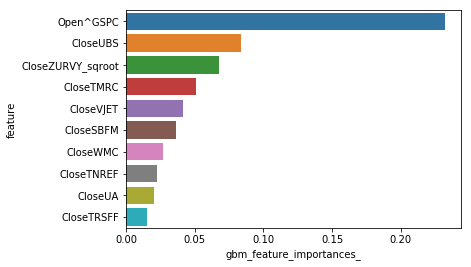

In [461]:
start = time.time()
gbm([3,5,7],[5,10],[50,300,500],[0.15,0.2],df_new1,y)
end= time.time()


In [462]:
tot_time = end-start
print("Time taken to run GBM with Hyperparameter tuning: ",tot_time)

TIme taken to run GBM with Hyperparameter tuning:  40.2572283744812


### XGBoost

In [44]:
#  XGBoost with GridSearch
def xgb_grid(max_depth_l,min_samples_split_l,n_estimators_l,learning_rate_l,x,y):
    
    default_params = {'max_depth' : 3, 'min_samples_split':2, 'n_estimators':100, 'learning_rate':0.1}
    if [default_params['max_depth']] not in max_depth_l:
        max_depth_l.append(default_params['max_depth'])
        
    if [default_params['min_samples_split']] not in min_samples_split_l:    
        min_samples_split_l.append(default_params['min_samples_split'])
        
    if [default_params['n_estimators']] not in n_estimators_l:     
        n_estimators_l.append(default_params['n_estimators'])
        
    if [default_params['learning_rate']] not in learning_rate_l: 
        learning_rate_l.append(default_params['learning_rate'])
    
    
    
    """
    Function to generate Variable Importance Plot on the basis of GBM.
    
    # Arguments
        x: Input dataframe - Independent features
        y: Input dataframe - Target feature
        max_depth_l: list of max_depth hyperparameter
        min_samples_split_l: list of min_samples_split hyperparameter
        n_estimators_l: list of n_estimators_l hyperparameter
        learning_rate_l: list of learning_rate_l hyperparameter
        
    # Returns
        dataframe: Return a dataframe with Transformed Variables
    """
    
    
    param_test = {'max_depth':max_depth_l, 'min_samples_split':min_samples_split_l,
                   'n_estimators': n_estimators_l, 'learning_rate': learning_rate_l}
    gsearch = GridSearchCV(estimator = XGBRegressor(max_features='sqrt', subsample=0.8, random_state=10), 
    param_grid = param_test, scoring='r2',n_jobs=4,iid=False, cv=5)
    gsearch.fit(x,y)
    #gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

    xgb1 = XGBRegressor(learning_rate = gsearch.best_params_['learning_rate'] , min_samples_split =gsearch.best_params_['min_samples_split'],
                                   n_estimators = gsearch.best_params_['n_estimators'], max_depth = gsearch.best_params_['max_depth'])
    xgb1.fit(x,y)
    features_df = pd.DataFrame({'feature': x.columns,'xgb_feature_importances_':xgb1.feature_importances_,}).sort_values('xgb_feature_importances_',ascending=False).reset_index()

    return(sns.barplot(x='xgb_feature_importances_',y='feature',data=features_df))
    

C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:20:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:20:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


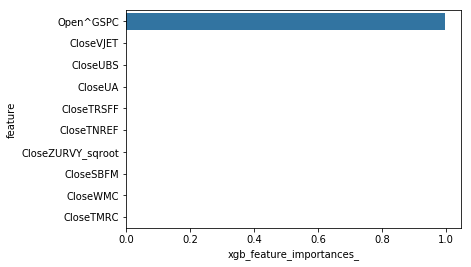

In [45]:
start = time.time()
xgb_([3,5,7],[5,10],[50,300,500],[0.15,0.2],df_new1,y)
end= time.time()

In [39]:
tot_time = end-start
print("Time taken to run GBM with Hyperparameter tuning: ",tot_time)

Time taken to run GBM with Hyperparameter tuning:  37.17667317390442


C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\nitin\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[15:46:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


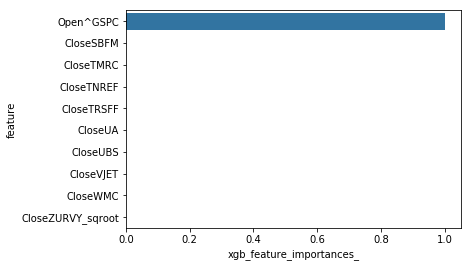

In [49]:
start = time.time()
xgb_ng(5,10,100,0.1,df_new1,y)
end= time.time()

In [ ]:
tot_time = end-start
print("Time taken to run GBM with Hyperparameter tuning: ",tot_time)